In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
from helpers import *
from implementations import *
from encoding import *

In [4]:
data_path = 'data'
x_train_preclean, x_test_preclean, y_train, train_ids, test_ids = load_csv_data(data_path)

# Getting an idea of the data

In [5]:
print("X train", x_train_preclean.shape)
print("X test", x_test_preclean.shape)

X train (328135, 321)
X test (109379, 321)


Text(0, 0.5, '# of columns')

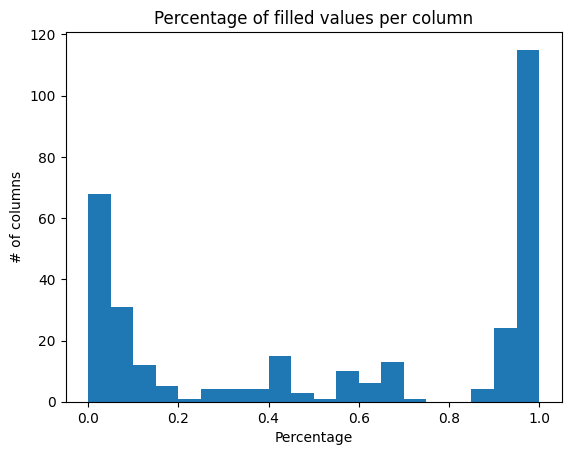

In [6]:
## Find how many values are completely empty in column
def percentageFilled(data):
    return 1 - np.isnan(data).sum() / len(data)

percentage_filled = np.apply_along_axis(percentageFilled, 0, x_train_preclean)

plt.hist(percentage_filled, bins=20)
plt.title("Percentage of filled values per column")
plt.xlabel("Percentage")
plt.ylabel("# of columns")

# Data Cleaning

In [7]:
 x_train, filter, categorical_filter, corr_filter, num_transform, cat_transform = process_train(x_train_preclean)
 x_test = process_test(x_test_preclean, filter, categorical_filter, corr_filter, num_transform, cat_transform)


# Logistic regression *WITH* regularization

In [ ]:
initial_w = np.zeros(x_train.shape[1], dtype=np.float64)
max_iters = 100
gamma = 0.01
lambda_ = 0.001 #0.0001
lambda_adam = 0.001
gamma_sgd = 0.1
w_ada, loss_AdaGrad, losses, t = regularized_log_AdaGrad(y_train, x_train, initial_w, max_iters, gamma, lambda_)
w_sgd, loss_sgd, losses_sgd, t_sgd = regularized_log_reg_sgd(y_train, x_train, initial_w, max_iters, gamma_sgd, lambda_)

In [ ]:
num_iterations = len(losses)
iterations = range(1, num_iterations + 1)

# Create the plot
plt.figure(figsize=(7, 5))  # Adjust the figure size as needed
plt.plot(iterations, losses, linestyle='-', label='Adaptive leaning rate')
plt.plot(iterations, losses_sgd, linestyle='-', label='Annealing learning rate')
# Add labels and a title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning rate')

# Show the plot
plt.grid(True)
plt.legend()

In [ ]:

tx_train, tx_val, ty_train, y_val = split_data(x_train, y_train, 0.8)


lambdas= np.logspace(-5, -1, 8)
print(lambdas)
max_iters = 100
initial_w = np.zeros(tx_train.shape[1])
gamma = 0.1
losses_tr = []
losses_te = []

for lambda_ in lambdas:
  w, loss_tr, l, _ = regularized_log_reg_sgd(ty_train, tx_train, initial_w, max_iters, gamma, lambda_)

  loss_val = logistic_loss(y_val, tx_val, w) + (lambda_ / 2) * np.squeeze(w.T @ w)
  losses_tr.append(loss_tr)
  losses_te.append(loss_val)

loss_tr = [np.mean(sublist) for sublist in losses_tr]


plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Plot training losses
plt.plot(lambdas, loss_tr, label='Training Loss', linestyle='-')

# Plot validation losses
plt.plot(lambdas, losses_te, label='Validation Loss', linestyle='-')

# Add labels and a title
#plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Lambda')

plt.legend()
# Show the plot
plt.grid(True)
plt.show()


In [ ]:
y_pred_w_ada = prediction_labels(w_ada, x_train)
f1_score(y_pred_w_ada, y_train)

In [ ]:
y_pred_w_sgd = prediction_labels(w_sgd, x_train)
f1_score(y_pred_w_sgd, y_train)

In [ ]:
loss_tr,loss_tt, f1_scores, weights, y_preds = get_best_parameters(y_train, x_train, np.zeros(x_train.shape[1]), 10000, 4, 0.05, np.logspace(-4, 0, 20))